<a href="https://colab.research.google.com/github/cbowler1234/ECGR4090_Tabkhi_Hw/blob/main/Hw4/Hw4_4090.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [44]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [45]:

device = (torch.device('cuda') if torch.cuda.is_available()
else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


In [46]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [47]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [48]:
label_map = {6: 0, 7: 1,8:2,9:3}
class_names = ['frog','horse','ship','truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [6, 7,8,9]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [6, 7,8,9]]

In [49]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                n_out, # <3>
            )
        )

In [50]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [51]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [52]:
softmax(x).sum()

tensor(1.)

In [53]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [54]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


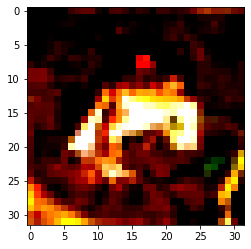

In [55]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [56]:
img_batch = img.view(-1).unsqueeze(0)

In [57]:
out = model(img_batch)
out

tensor([[0.4813, 0.5187]], grad_fn=<SoftmaxBackward>)

In [58]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [59]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [60]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()
mse(out)

tensor(0.1500)

In [61]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [62]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod

likelihood(out)

tensor([0.3024])

In [63]:
def neg_log_likelihood(out):
    return -likelihood(out).log()

neg_log_likelihood(out)

tensor([1.1960])

In [64]:
out0 = out.clone().detach()
out0[0] = torch.tensor([0.9, 0.1]) # more right

out2 = out.clone().detach()
out2[0] = torch.tensor([0.4, 0.6]) # slightly wrong

out3 = out.clone().detach()
out3[0] = torch.tensor([0.1, 0.9]) # very wrong

mse_comparison = torch.tensor([mse(o) for o in [out0, out, out2, out3]])
mse_comparison

tensor([0.0750, 0.1500, 0.2500, 0.4750])

In [65]:
((mse_comparison / mse_comparison[1]) - 1) * 100

tensor([-50.0000,   0.0000,  66.6667, 216.6667])

In [66]:
nll_comparison = torch.tensor([neg_log_likelihood(o) 
                               for o in [out0, out, out2, out3]])
nll_comparison

tensor([0.7905, 1.1960, 1.6015, 2.9878])

In [67]:
((nll_comparison / nll_comparison[1]) - 1) * 100

tensor([-33.9016,   0.0000,  33.9016, 149.8121])

In [68]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [69]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [70]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [71]:
log_softmax(x)

tensor([[-104.,    0.]])

In [72]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [73]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [74]:
loss = nn.NLLLoss()

In [75]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.8378, grad_fn=<NllLossBackward>)

In [76]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 4),
            nn.LogSoftmax(dim=1)).to(device=device)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 200
start=time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
stop=time.time()
duration= stop-start
print(duration)

Epoch: 0, Loss: 0.709550
Epoch: 1, Loss: 0.619307
Epoch: 2, Loss: 1.054392
Epoch: 3, Loss: 0.710791
Epoch: 4, Loss: 0.594423
Epoch: 5, Loss: 0.531334
Epoch: 6, Loss: 0.473141
Epoch: 7, Loss: 0.596265
Epoch: 8, Loss: 0.741933
Epoch: 9, Loss: 0.386836
Epoch: 10, Loss: 0.624176
Epoch: 11, Loss: 0.413143
Epoch: 12, Loss: 0.465522
Epoch: 13, Loss: 0.518968
Epoch: 14, Loss: 0.347353
Epoch: 15, Loss: 0.521088
Epoch: 16, Loss: 0.405736
Epoch: 17, Loss: 0.237977
Epoch: 18, Loss: 0.456190
Epoch: 19, Loss: 0.254552
Epoch: 20, Loss: 0.512944
Epoch: 21, Loss: 0.229965
Epoch: 22, Loss: 0.293783
Epoch: 23, Loss: 0.346775
Epoch: 24, Loss: 0.264755
Epoch: 25, Loss: 0.247713
Epoch: 26, Loss: 0.150990
Epoch: 27, Loss: 0.111717
Epoch: 28, Loss: 0.209370
Epoch: 29, Loss: 0.215649
Epoch: 30, Loss: 0.218999
Epoch: 31, Loss: 0.092625
Epoch: 32, Loss: 0.133992
Epoch: 33, Loss: 0.150693
Epoch: 34, Loss: 0.141198
Epoch: 35, Loss: 0.178996
Epoch: 36, Loss: 0.202224
Epoch: 37, Loss: 0.133415
Epoch: 38, Loss: 0.144

In [78]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [79]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.777750


In [80]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 4),
            nn.LogSoftmax(dim=1))

In [81]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 4))

loss_fn = nn.CrossEntropyLoss()

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 4)).to(device=device)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200
start=time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
stop=time.time()
duration= stop-start
print(duration)

Epoch: 0, Loss: 0.742844
Epoch: 1, Loss: 0.544447
Epoch: 2, Loss: 0.567063
Epoch: 3, Loss: 0.596821
Epoch: 4, Loss: 0.561172
Epoch: 5, Loss: 0.679898
Epoch: 6, Loss: 0.563178
Epoch: 7, Loss: 0.565844
Epoch: 8, Loss: 0.758182
Epoch: 9, Loss: 0.928950
Epoch: 10, Loss: 0.569579
Epoch: 11, Loss: 1.362335
Epoch: 12, Loss: 0.642160
Epoch: 13, Loss: 0.578659
Epoch: 14, Loss: 0.484896
Epoch: 15, Loss: 0.361914
Epoch: 16, Loss: 0.343126
Epoch: 17, Loss: 0.404867
Epoch: 18, Loss: 0.245125
Epoch: 19, Loss: 0.465430
Epoch: 20, Loss: 0.150145
Epoch: 21, Loss: 0.417737
Epoch: 22, Loss: 0.287738
Epoch: 23, Loss: 0.246963
Epoch: 24, Loss: 0.230781
Epoch: 25, Loss: 0.141826
Epoch: 26, Loss: 0.157408
Epoch: 27, Loss: 0.383989
Epoch: 28, Loss: 0.146882
Epoch: 29, Loss: 0.077726
Epoch: 30, Loss: 0.048638
Epoch: 31, Loss: 0.028776
Epoch: 32, Loss: 0.736177
Epoch: 33, Loss: 0.035098
Epoch: 34, Loss: 0.005579
Epoch: 35, Loss: 0.016293
Epoch: 36, Loss: 0.017431
Epoch: 37, Loss: 0.016961
Epoch: 38, Loss: 0.011

In [83]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [84]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.760000


In [85]:
sum([p.numel() for p in model.parameters()])

3737732

In [86]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737732

In [87]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 4),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1575428

In [88]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [89]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [90]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [91]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [92]:
conv.weight.shape

torch.Size([16, 3, 3, 3])

In [93]:
conv.bias.shape

torch.Size([16])

In [94]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [95]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


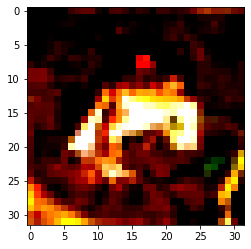

In [96]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

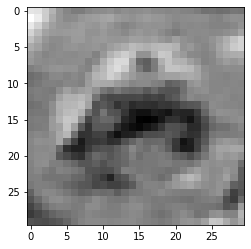

In [97]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [98]:
output.shape

torch.Size([1, 16, 30, 30])

In [99]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [100]:
output = conv(img.unsqueeze(0))

output.shape

torch.Size([1, 1, 32, 32])

In [101]:
with torch.no_grad():
    conv.bias.zero_()

In [102]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

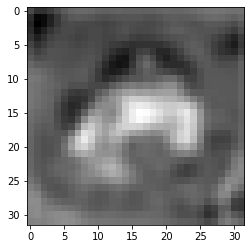

In [103]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [104]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

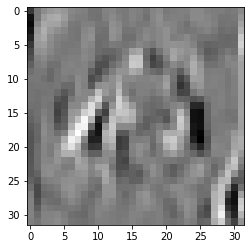

In [105]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [106]:
pool = nn.MaxPool2d(2)

In [107]:
output = pool(img.unsqueeze(0))

output.shape

torch.Size([1, 3, 16, 16])

In [108]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 4))

In [109]:
sum([p.numel() for p in model.parameters()])

18156

In [110]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 4)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [111]:
model = Net()

sum([p.numel() for p in model.parameters()])

18156

In [112]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 4)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [113]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.1363, -0.1127, -0.1349, -0.0853]], grad_fn=<AddmmBackward>)

In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 4)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net().to(device=device)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200
start=time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
stop=time.time()
duration= stop-start
print(duration)

Epoch: 0, Loss: 0.964538
Epoch: 1, Loss: 0.724162
Epoch: 2, Loss: 0.747962
Epoch: 3, Loss: 0.706957
Epoch: 4, Loss: 0.495163
Epoch: 5, Loss: 0.567699
Epoch: 6, Loss: 0.386466
Epoch: 7, Loss: 0.638354
Epoch: 8, Loss: 0.728167
Epoch: 9, Loss: 0.491828
Epoch: 10, Loss: 0.345216
Epoch: 11, Loss: 0.608542
Epoch: 12, Loss: 0.341203
Epoch: 13, Loss: 0.388523
Epoch: 14, Loss: 0.297853
Epoch: 15, Loss: 0.304053
Epoch: 16, Loss: 0.356352
Epoch: 17, Loss: 0.448935
Epoch: 18, Loss: 0.143963
Epoch: 19, Loss: 0.336888
Epoch: 20, Loss: 0.244590
Epoch: 21, Loss: 0.486749
Epoch: 22, Loss: 0.185261
Epoch: 23, Loss: 0.384221
Epoch: 24, Loss: 0.216494
Epoch: 25, Loss: 0.193540
Epoch: 26, Loss: 0.260862
Epoch: 27, Loss: 0.338492
Epoch: 28, Loss: 0.210572
Epoch: 29, Loss: 0.452789
Epoch: 30, Loss: 0.339210
Epoch: 31, Loss: 0.392468
Epoch: 32, Loss: 0.330184
Epoch: 33, Loss: 0.154263
Epoch: 34, Loss: 0.128836
Epoch: 35, Loss: 0.224063
Epoch: 36, Loss: 0.376281
Epoch: 37, Loss: 0.088077
Epoch: 38, Loss: 0.265

In [115]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.998350


In [116]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.893250


In [117]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 4)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()
sum([p.numel() for p in model.parameters()])

18156

In [118]:
label_map = {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10}
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0,1,2,3,4,5,6,7,8,9]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0,1,2,3,4,5,6,7,8,9]]

In [119]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 11)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 11)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net().to(device=device)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200
start=time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
stop=time.time()
duration= stop-start
print(duration)

Epoch: 0, Loss: 1.630632
Epoch: 1, Loss: 1.626038
Epoch: 2, Loss: 1.473959
Epoch: 3, Loss: 1.014542
Epoch: 4, Loss: 1.309493
Epoch: 5, Loss: 1.452033
Epoch: 6, Loss: 0.984312
Epoch: 7, Loss: 1.058070
Epoch: 8, Loss: 1.234672
Epoch: 9, Loss: 1.363614
Epoch: 10, Loss: 1.229454
Epoch: 11, Loss: 1.573955
Epoch: 12, Loss: 1.040215
Epoch: 13, Loss: 0.997568
Epoch: 14, Loss: 1.200594
Epoch: 15, Loss: 0.687044
Epoch: 16, Loss: 0.784708
Epoch: 17, Loss: 1.193579
Epoch: 18, Loss: 0.966077
Epoch: 19, Loss: 0.866512
Epoch: 20, Loss: 0.907054
Epoch: 21, Loss: 0.967395
Epoch: 22, Loss: 1.111829
Epoch: 23, Loss: 0.850336
Epoch: 24, Loss: 0.974863
Epoch: 25, Loss: 0.825736
Epoch: 26, Loss: 1.006421
Epoch: 27, Loss: 1.136679
Epoch: 28, Loss: 1.106830
Epoch: 29, Loss: 0.985275
Epoch: 30, Loss: 0.463608
Epoch: 31, Loss: 0.740429
Epoch: 32, Loss: 1.185346
Epoch: 33, Loss: 0.788887
Epoch: 34, Loss: 1.607178
Epoch: 35, Loss: 0.955403
Epoch: 36, Loss: 0.809623
Epoch: 37, Loss: 1.026389
Epoch: 38, Loss: 0.759

In [121]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.793160


In [122]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.605700


In [123]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 11)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()
sum([p.numel() for p in model.parameters()])

18387

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear( 4* 4 * 16, 32)
        self.fc2 = nn.Linear(32, 11)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        
        out = out.view(-1, 4 * 4* 16)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net().to(device=device)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200
start=time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
      imgs = imgs.to(device=device)
      labels = labels.to(device=device)
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)
                
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
stop=time.time()
duration= stop-start
print(duration)

Epoch: 0, Loss: 1.815450
Epoch: 1, Loss: 1.774333
Epoch: 2, Loss: 1.412293
Epoch: 3, Loss: 1.370417
Epoch: 4, Loss: 1.456674
Epoch: 5, Loss: 1.318353
Epoch: 6, Loss: 1.207792
Epoch: 7, Loss: 1.057680
Epoch: 8, Loss: 1.056420
Epoch: 9, Loss: 1.383750
Epoch: 10, Loss: 0.842261
Epoch: 11, Loss: 0.998506
Epoch: 12, Loss: 1.673004
Epoch: 13, Loss: 1.144144
Epoch: 14, Loss: 0.939932
Epoch: 15, Loss: 0.854558
Epoch: 16, Loss: 1.076940
Epoch: 17, Loss: 1.116426
Epoch: 18, Loss: 0.966814
Epoch: 19, Loss: 0.837389
Epoch: 20, Loss: 0.772777
Epoch: 21, Loss: 0.987383
Epoch: 22, Loss: 0.610867
Epoch: 23, Loss: 0.979771
Epoch: 24, Loss: 0.486308
Epoch: 25, Loss: 0.939357
Epoch: 26, Loss: 0.481328
Epoch: 27, Loss: 1.017589
Epoch: 28, Loss: 0.849248
Epoch: 29, Loss: 0.738298
Epoch: 30, Loss: 0.400650
Epoch: 31, Loss: 0.532152
Epoch: 32, Loss: 0.565460
Epoch: 33, Loss: 0.860892
Epoch: 34, Loss: 0.415114
Epoch: 35, Loss: 0.646673
Epoch: 36, Loss: 0.603723
Epoch: 37, Loss: 0.987874
Epoch: 38, Loss: 0.904

In [126]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.833980


In [127]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.682800


In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear( 4* 4 * 16, 32)
        self.fc2 = nn.Linear(32, 11)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        
        out = out.view(-1, 4 * 4* 16)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()
sum([p.numel() for p in model.parameters()])


16427